In [1]:
import textract
import pandas as pd
import os

In [2]:
resume_folder_path = '/home/ayusheea/Documents/ML_VirtualEnvs/ResumeSelectionProject/SkillMapping/data/Eximius Employees Resumes PDF Format'
skillsheet_file_path = '/home/ayusheea/Documents/ML_VirtualEnvs/ResumeSelectionProject/SkillMapping/data/Key Word Search.xlsx'

In [3]:
skill_sheet = pd.read_excel(skillsheet_file_path, header=[1, 2], dtype=str)
skill_sheet = skill_sheet.drop(skill_sheet.columns[0], axis=1)

In [4]:
skill_sheet.head()

Recuitment Team Key Word Search                         \
           Embedded - Recruitment Avionics - Recruitment   
0                      Embedded C                   RTRT   
1                               C            Vector Cast   
2                        Firmware                   LDRA   
3                             BSP                DO-178B   
4              Kernal Programming              ARINC 429   

                                                    Internal Keyword Search  
  Automotive - Recruitment Automation - Recruitment            RMG - Sharad  
0                  Autosar                   Python               Baremetal  
1        Autosar Developer        Python Automation                   Yocto  
2      Autosar Development      Automation Testing                   802.11  
3                      CAN                Framework                     ARM  
4                    Canoe                     NVMe                     MSM

In [5]:
skills_dict = {}
all_skills = []
for label, label_data in skill_sheet.iteritems():
    skills_dict[label] = label_data.dropna()
    all_skills.extend(label_data.dropna().tolist())

In [40]:
all_resume_data = []
cnt = 0
for each_file in os.listdir(resume_folder_path):
    each_resume_dict = {}
    skills_found = []
    each_file_path = os.path.join(resume_folder_path, each_file)
    each_file_str = textract.process(each_file_path, encoding='ascii').decode()
    each_resume_dict['Filename'] = each_file
    each_resume_dict['ResumeString'] = each_file_str
    skills_dict = {}
    for each_skill in all_skills:
        each_skill = each_skill.strip()
        skills_dict[each_skill] = 0
        if each_skill in each_file_str:
            skills_dict[each_skill] = 1
            skills_found.append(each_skill)
    
    each_resume_dict['SkillsDict'] = skills_dict
    
    
    each_resume_dict['SkillsFound'] = list(set(skills_found))
    all_resume_data.append(each_resume_dict)
    cnt += 1

In [41]:
temp_df = pd.DataFrame(all_resume_data)

In [42]:
temp_df.head()

,Filename,ResumeString,SkillsDict,SkillsFound
0,Eximius Design - Swetabh Suman.pdf,ED/DE/SS/3_2\nDevelopment Engineer Swetabh Su...,"{'Embedded C': 0, 'C': 1, 'Firmware': 0, 'BSP'...","[Framework, Python, C, Android, IPC]"
1,Eximius Design - Priyadarshini Satapathy.pdf,ED/VA/132/PS/5\nValidation Engineer Priyadars...,"{'Embedded C': 0, 'C': 1, 'Firmware': 1, 'BSP'...","[Python, SSD, C, SATA, UART, Firmware]"
2,Eximius Design - Bhanu Kumar.pdf,ED/DE/524/BKRV/11\nDevelopment Engineer - Bhan...,"{'Embedded C': 0, 'C': 1, 'Firmware': 1, 'BSP'...","[ARM, SSD, C, SATA, IPC, Firmware, BCM, I2C, N..."
3,Eximius Design - Dileep Prem Kumar Katta.pdf,ED/DE/030/DPKK/11_5\nDevelopment Engineer Dil...,"{'Embedded C': 0, 'C': 1, 'Firmware': 1, 'BSP'...","[Framework, ARM, SCSI, SSD, C, SATA, Firmware,..."
4,Eximius Design - Smisha C B.pdf,ED/DE//SCB/3\nDevelopment Engineer Smisha C B...,"{'Embedded C': 0, 'C': 1, 'Firmware': 0, 'BSP'...","[Framework, C, Android]"


In [43]:
df_final = pd.concat([temp_df['Filename'], temp_df['SkillsDict'].apply(pd.Series)], axis = 1)

In [44]:
df_final.head()

,Filename,Embedded C,C,Firmware,BSP,Kernal Programming,LDD,IPC,Multithreading,RTOS,...,802.11,ARM,MSM,FPGA,BCM,Microcontrollers,Android,Kernal,Automation,WLAN Development
0,Eximius Design - Swetabh Suman.pdf,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Eximius Design - Priyadarshini Satapathy.pdf,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Eximius Design - Bhanu Kumar.pdf,0,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,Eximius Design - Dileep Prem Kumar Katta.pdf,0,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,Eximius Design - Smisha C B.pdf,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
df_final.sum(numeric_only=True).sort_values(ascending=False)

C                       208
Python                   90
ARM                      87
I2C                      85
UART                     79
Android                  77
SPI                      73
Firmware                 63
Embedded C               56
Automation               55
Framework                53
RTOS                     41
IPC                      40
802.11                   35
BSP                      32
FPGA                     26
SSD                      26
Device driver            25
CAN                      25
SATA                     19
NVMe                     17
SCSI                     17
MSM                      17
Yocto                    14
BCM                      13
Bootloader               11
Microcontrollers          9
iSCSI                     7
Linux Internals           7
Matlab                    7
                       ... 
OS Internals              2
LDD                       2
IBM Rational              2
Canoe                     2
Canalyzer           

## ngrams frequency evaluation

In [46]:
all_resume_data[0].keys()

dict_keys(['Filename', 'ResumeString', 'SkillsDict', 'SkillsFound'])

In [47]:
all_resume_data[0]['SkillsFound']

['Framework', 'Python', 'C', 'Android', 'IPC']

In [48]:
from nltk import everygrams

In [49]:
skills_ngram_freq = {}
for each_resume_data in all_resume_data:
    each_resume_skills = each_resume_data['SkillsFound']
    for x in sorted(list(everygrams(each_resume_skills))):
        skills_ngram_freq[x] = skills_ngram_freq.get(x, 0) + 1

In [50]:
skills_ngram_freq

{('Android',): 77,
 ('Android', 'IPC'): 17,
 ('C',): 208,
 ('C', 'Android'): 37,
 ('C', 'Android', 'IPC'): 6,
 ('Framework',): 53,
 ('Framework', 'Python'): 12,
 ('Framework', 'Python', 'C'): 5,
 ('Framework', 'Python', 'C', 'Android'): 2,
 ('Framework', 'Python', 'C', 'Android', 'IPC'): 1,
 ('IPC',): 40,
 ('Python',): 90,
 ('Python', 'C'): 26,
 ('Python', 'C', 'Android'): 8,
 ('Python', 'C', 'Android', 'IPC'): 2,
 ('C', 'SATA'): 13,
 ('C', 'SATA', 'UART'): 3,
 ('C', 'SATA', 'UART', 'Firmware'): 3,
 ('Firmware',): 63,
 ('Python', 'SSD'): 8,
 ('Python', 'SSD', 'C'): 6,
 ('Python', 'SSD', 'C', 'SATA'): 2,
 ('Python', 'SSD', 'C', 'SATA', 'UART'): 1,
 ('Python', 'SSD', 'C', 'SATA', 'UART', 'Firmware'): 1,
 ('SATA',): 19,
 ('SATA', 'UART'): 4,
 ('SATA', 'UART', 'Firmware'): 4,
 ('SSD',): 26,
 ('SSD', 'C'): 18,
 ('SSD', 'C', 'SATA'): 9,
 ('SSD', 'C', 'SATA', 'UART'): 2,
 ('SSD', 'C', 'SATA', 'UART', 'Firmware'): 2,
 ('UART',): 79,
 ('UART', 'Firmware'): 31,
 ('ARM',): 87,
 ('ARM', 'SSD'): 4,

In [63]:
sorted(skills_ngram_freq.items(), key=lambda x: x[1], reverse=True)

[(('C',), 208),
 (('Python',), 90),
 (('ARM',), 87),
 (('I2C',), 85),
 (('UART',), 79),
 (('Android',), 77),
 (('SPI',), 73),
 (('Firmware',), 63),
 (('Embedded C',), 56),
 (('Automation',), 55),
 (('Framework',), 53),
 (('RTOS',), 41),
 (('IPC',), 40),
 (('C', 'RTOS'), 40),
 (('C', 'Android'), 37),
 (('802.11',), 35),
 (('SPI', 'ARM'), 34),
 (('BSP',), 32),
 (('Embedded C', 'I2C'), 32),
 (('UART', 'Firmware'), 31),
 (('ARM', 'C'), 29),
 (('BSP', 'C'), 28),
 (('Python', 'C'), 26),
 (('SSD',), 26),
 (('FPGA',), 26),
 (('C', 'Python'), 26),
 (('Device driver',), 25),
 (('CAN',), 25),
 (('UART', 'Embedded C'), 23),
 (('CAN', 'C'), 21),
 (('Framework', 'C'), 20),
 (('SATA',), 19),
 (('SPI', 'Python'), 19),
 (('SSD', 'C'), 18),
 (('IPC', 'UART'), 18),
 (('UART', 'Embedded C', 'I2C'), 18),
 (('Android', 'IPC'), 17),
 (('NVMe',), 17),
 (('SCSI',), 17),
 (('Android', 'Automation'), 17),
 (('C', 'Automation'), 17),
 (('MSM',), 17),
 (('ARM', 'BSP'), 16),
 (('C', 'UART'), 16),
 (('Firmware', 'Em

In [66]:
df_final.corr()

,Embedded C,C,Firmware,BSP,Kernal Programming,LDD,IPC,Multithreading,RTOS,Bootloader,...,802.11,ARM,MSM,FPGA,BCM,Microcontrollers,Android,Kernal,Automation,WLAN Development
Embedded C,1.000000,NaN,0.024495,0.071637,NaN,0.162334,0.033849,0.046269,0.162426,0.001863,...,-0.099176,0.342276,-0.022826,-0.032774,0.022389,0.190550,-0.061299,NaN,0.004726,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Firmware,0.024495,NaN,1.000000,0.008923,NaN,-0.064948,0.023484,-0.035140,0.278302,-0.015508,...,-0.072742,0.204664,0.032500,0.225409,0.002701,-0.037331,-0.136991,NaN,-0.015626,NaN
BSP,0.071637,NaN,0.008923,1.000000,NaN,-0.042015,0.130039,0.020076,0.090179,0.077859,...,-0.013699,0.286758,0.164627,-0.120873,0.165145,0.040302,0.114631,NaN,-0.134800,NaN
Kernal Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LDD,0.162334,NaN,-0.064948,-0.042015,NaN,1.000000,-0.048079,-0.015464,-0.048822,-0.023283,...,0.087372,0.016326,-0.029396,-0.037242,0.178088,-0.020954,-0.075542,NaN,0.164341,NaN
IPC,0.033849,NaN,0.023484,0.130039,NaN,-0.048079,1.000000,0.082706,0.156858,0.102724,...,-0.089044,0.204499,-0.011988,0.036886,0.025198,0.076098,0.055386,NaN,-0.071278,NaN
Multithreading,0.046269,NaN,-0.035140,0.020076,NaN,-0.015464,0.082706,1.000000,0.001138,-0.037085,...,-0.070591,0.057820,-0.046821,-0.059318,-0.040522,-0.033376,0.074694,NaN,-0.094096,NaN
RTOS,0.162426,NaN,0.278302,0.090179,NaN,-0.048822,0.156858,0.001138,1.000000,0.098911,...,-0.093650,0.290345,0.116858,0.178142,0.071768,0.072819,0.145718,NaN,-0.077859,NaN
Bootloader,0.001863,NaN,-0.015508,0.077859,NaN,-0.023283,0.102724,-0.037085,0.098911,1.000000,...,-0.106286,0.191575,0.007917,0.040597,0.027733,0.160910,-0.003208,NaN,0.004449,NaN


In [68]:
import matplotlib.pyplot as plt

plt.matshow(df_final.corr())
plt.show()

<Figure size 480x480 with 1 Axes>

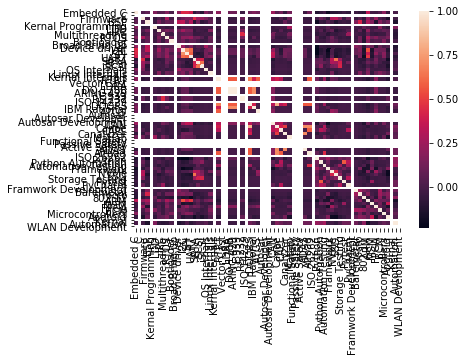

In [69]:
import seaborn as sns
corr = df_final.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [71]:
import numpy as np

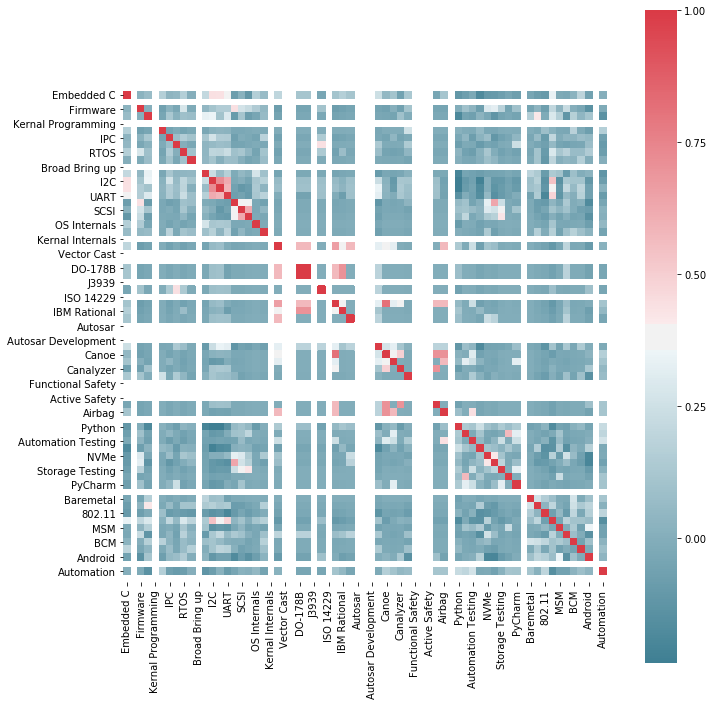

In [77]:
import seaborn as sns

f, ax = plt.subplots(figsize=(11, 12))
corr = df_final.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [78]:
sorted(skills_ngram_freq.items(), key=lambda x: x[1])

[(('Framework', 'Python', 'C', 'Android', 'IPC'), 1),
 (('Python', 'SSD', 'C', 'SATA', 'UART'), 1),
 (('Python', 'SSD', 'C', 'SATA', 'UART', 'Firmware'), 1),
 (('ARM', 'SSD', 'C', 'SATA', 'IPC'), 1),
 (('ARM', 'SSD', 'C', 'SATA', 'IPC', 'Firmware'), 1),
 (('ARM', 'SSD', 'C', 'SATA', 'IPC', 'Firmware', 'BCM'), 1),
 (('ARM', 'SSD', 'C', 'SATA', 'IPC', 'Firmware', 'BCM', 'I2C'), 1),
 (('ARM', 'SSD', 'C', 'SATA', 'IPC', 'Firmware', 'BCM', 'I2C', 'NVMe'), 1),
 (('BCM', 'I2C', 'NVMe'), 1),
 (('C', 'SATA', 'IPC'), 1),
 (('C', 'SATA', 'IPC', 'Firmware'), 1),
 (('C', 'SATA', 'IPC', 'Firmware', 'BCM'), 1),
 (('C', 'SATA', 'IPC', 'Firmware', 'BCM', 'I2C'), 1),
 (('C', 'SATA', 'IPC', 'Firmware', 'BCM', 'I2C', 'NVMe'), 1),
 (('Firmware', 'BCM', 'I2C'), 1),
 (('Firmware', 'BCM', 'I2C', 'NVMe'), 1),
 (('IPC', 'Firmware', 'BCM'), 1),
 (('IPC', 'Firmware', 'BCM', 'I2C'), 1),
 (('IPC', 'Firmware', 'BCM', 'I2C', 'NVMe'), 1),
 (('SATA', 'IPC'), 1),
 (('SATA', 'IPC', 'Firmware'), 1),
 (('SATA', 'IPC', 'Fir